### Obtaining the efficient frontier in Python 

In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [7]:
pf_data.tail()

,PG,^GSPC
Date,,
2019-06-19,110.419998,2926.459961
2019-06-20,111.739998,2954.179932
2019-06-21,111.199997,2950.459961
2019-06-24,112.330002,2945.350098
2019-06-25,112.080002,2935.689941


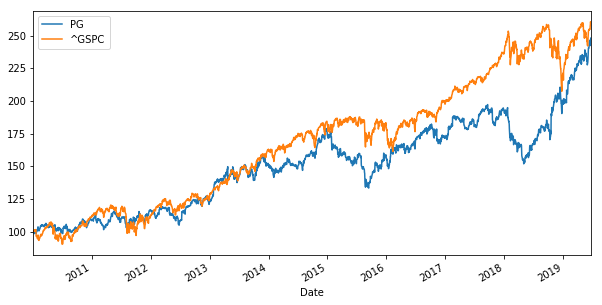

In [8]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))

If we want to obtain an efficient frotier composed of these assets we would need their log returns, average and covariance and correlation matrices.

In [9]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
log_returns.mean() * 250 

PG       0.095249
^GSPC    0.099841
dtype: float64

In [11]:
log_returns.cov() * 250 

,PG,^GSPC
PG,0.021267,0.011438
^GSPC,0.011438,0.022061


In [12]:
log_returns.corr()

,PG,^GSPC
PG,1.00000,0.52806
^GSPC,0.52806,1.00000


I will address portfolio optimization from a technical perspective. I must create a variable that will carry the number of assets in a portfolio

In [13]:
num_assets = len(assets)

In [14]:
num_assets 

2

In [15]:
arr = np.random.random(2)
arr

array([0.00116982, 0.75356312])

In [16]:
arr[0] + arr[1]

0.7547329364128575

The two randomly generated number do not add up to 1. Instead we can randomly generate an array called weights. Then use "incrementing" 

weights = weights / sum(weights) 
        = W1/(w1+w2) + W2/(w1+w2) 
        = 1

In [17]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights 

array([0.48993866, 0.51006134])

In [18]:
weights[0] + weights[1]

1.0

### Markowitz Mean Variance Theory

Expected Portfolio Return: 

In [19]:
np.sum(weights * log_returns.mean()) * 250 

0.097591209600559

Expected Portfolio Variance 

In [20]:
np.dot(weights.T, np.dot(log_returns.cov() *250, weights))

0.01656086252872081

Expected portfolio Volatility 

In [21]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() *250, weights)))

0.12868901479427375

I want to create a graph that visualizes the hypothetical portfolio returns vs volatilities

In [23]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000): 
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities 

([0.09749230535101648,
  0.09693616656850206,
  0.09838085771218455,
  0.09955348758482294,
  0.09629767700362282,
  0.09706489300516952,
  0.09767312914739215,
  0.09691929294063513,
  0.09816718350352889,
  0.09817700350953801,
  0.0967024094729564,
  0.09731474426536159,
  0.09695617001227008,
  0.09730613719743926,
  0.09699075004733425,
  0.09680483872804449,
  0.09977893309101953,
  0.09661262336296464,
  0.09749987946442817,
  0.09703583540404137,
  0.09617096441055326,
  0.0983800840361078,
  0.09750802750774637,
  0.09767843589735249,
  0.09772897795188866,
  0.09614778918503705,
  0.09698328870526178,
  0.09739076146820681,
  0.09525105902672042,
  0.0981563620550005,
  0.09967163790612742,
  0.09597770201116959,
  0.0959645910339842,
  0.09830827404315515,
  0.09799217549149078,
  0.09746474786828385,
  0.09766726659133307,
  0.09774750571136187,
  0.09750671682611678,
  0.09871789578578578,
  0.09554348444580778,
  0.09757376681155304,
  0.09874781524949505,
  0.09782121889

I generated two empty lists for returns and volatilities. Then, generated 1000 random values and filled the lists using the append function. Now, we need to convert these lists into numpy arrays

In [26]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean() * 250))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities 

(array([0.09719428, 0.0973381 , 0.09783331, 0.09558365, 0.09766498,
        0.09846444, 0.09638138, 0.0993387 , 0.09792009, 0.09685438,
        0.0982691 , 0.09819691, 0.09620724, 0.09722959, 0.09772867,
        0.0966938 , 0.09951631, 0.09612491, 0.09750012, 0.0988916 ,
        0.09680708, 0.09740278, 0.09847964, 0.09940493, 0.09763557,
        0.0977631 , 0.09900219, 0.09775614, 0.09524961, 0.09752006,
        0.09743295, 0.09759393, 0.0963977 , 0.09578703, 0.09639933,
        0.09720463, 0.0979633 , 0.0964513 , 0.09760919, 0.09689517,
        0.09676138, 0.09791717, 0.0971634 , 0.09604874, 0.09866677,
        0.09958798, 0.09955077, 0.09713991, 0.09772425, 0.09829258,
        0.0970627 , 0.09776281, 0.09728685, 0.0985905 , 0.09816874,
        0.09645066, 0.09671349, 0.09820837, 0.09777943, 0.09539248,
        0.09822211, 0.09719807, 0.09560309, 0.09814126, 0.09900777,
        0.09564294, 0.09742543, 0.09944168, 0.09943105, 0.09697337,
        0.09809781, 0.09822992, 0.09974621, 0.09

### Plotting the Arrays 

In [27]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [28]:
portfolios.head()

,Return,Volatility
0,0.097194,0.128878
1,0.097338,0.128672
2,0.097833,0.129156
3,0.095584,0.141222
4,0.097665,0.128785


In [29]:
portfolios.tail()

,Return,Volatility
995,0.098406,0.131983
996,0.096623,0.131209
997,0.098809,0.135344
998,0.098231,0.130865
999,0.097875,0.129279


Text(0,0.5,'Expected Return')

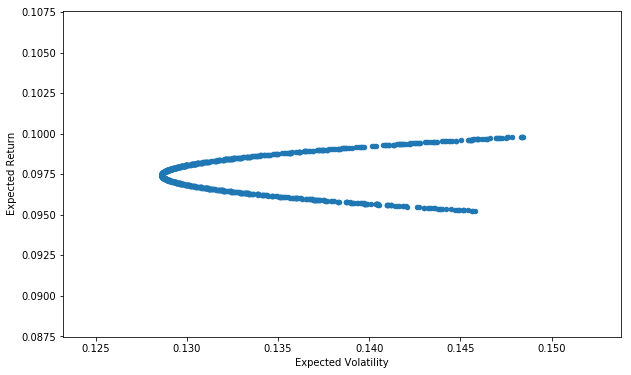

In [30]:
portfolios.plot (x = 'Volatility', y = 'Return', kind = 'scatter', figsize =(10,6));
plt.xlabel("Expected Volatility")
plt.ylabel('Expected Return')